In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme
sns.set()

%matplotlib inline

In [2]:
%ll

total 81904
-rw-r--r--  1 yannis  staff     60565 Oct  8 12:14 DTW_Example.ipynb
-rw-r--r--  1 yannis  staff     43879 Oct  7 10:01 HAC.ipynb
-rw-r--r--  1 yannis  staff   2441369 Oct  7 19:33 SP500Sheet.ipynb
-rw-r--r--@ 1 yannis  staff     18703 Oct  2 13:43 SP500_Infos.csv
-rw-rw-rw-@ 1 yannis  staff     19842 Sep 14 12:15 SP500_Infos.xlsx
-rw-r--r--@ 1 yannis  staff  23270444 Oct  2 13:44 SP500_Stock_Prices.csv
-rw-rw-rw-@ 1 yannis  staff  15141973 Sep 14 12:15 SP500_Stock_Prices.xlsx
-rw-rw-rw-@ 1 yannis  staff      9578 Sep 14 12:14 clustering_SP500.Rmd
-rw-rw-rw-@ 1 yannis  staff      2101 Sep 14 12:15 get_stock_prices.R


In [2]:
df_infos = pd.read_csv('SP500_Infos.csv')
df_infos.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care


In [3]:
df_stock = pd.read_csv('SP500_Stock_Prices.csv')
df_stock.head()

,Symbol,Date,Open,High,Low,Close,Volume,Adjusted
0,MMM,02.01.18,235.779999,237.070007,232.809998,235.639999,2931000,215.948410
1,MMM,03.01.18,235.070007,235.729996,233.289993,235.630005,2193700,215.939209
2,MMM,04.01.18,237.000000,239.440002,236.470001,238.710007,2243100,218.761826
3,MMM,05.01.18,238.649994,240.899994,237.740005,240.570007,1835900,220.466415
4,MMM,08.01.18,239.380005,240.940002,239.179993,239.789993,1869000,219.751572


# Clean Data

## Transform Date column to pandas date object

In [4]:
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format="%d.%m.%y")

## Count and remove missing data if necessary

In [5]:
df_stock.isnull().sum(axis = 0)

Symbol      0
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Adjusted    0
dtype: int64

## Compare length of the time series of each company

In [8]:
company_ts_count = df_stock.groupby(df_stock['Symbol']).count()
#print(company_ts_count)
max_cc = max(company_ts_count['Volume'])
#print(max_cc)

low_symbols = []
for index, value in company_ts_count['Volume'].items():
    if value < max_cc:
        print(index, value)
        low_symbols.append(index)
print(low_symbols)


[]


### Drop Companies, which are lower than the max lenth

In [7]:
df_stock = df_stock[~df_stock.Symbol.isin(low_symbols)]
df_stock.head()

,Symbol,Date,Open,High,Low,Close,Volume,Adjusted
0,MMM,2018-01-02,235.779999,237.070007,232.809998,235.639999,2931000,215.948410
1,MMM,2018-01-03,235.070007,235.729996,233.289993,235.630005,2193700,215.939209
2,MMM,2018-01-04,237.000000,239.440002,236.470001,238.710007,2243100,218.761826
3,MMM,2018-01-05,238.649994,240.899994,237.740005,240.570007,1835900,220.466415
4,MMM,2018-01-08,239.380005,240.940002,239.179993,239.789993,1869000,219.751572


In [9]:
stocks_close = df_stock[['Symbol', 'Date', 'Close']]
stocks_close.head()

,Symbol,Date,Close
0,MMM,2018-01-02,235.639999
1,MMM,2018-01-03,235.630005
2,MMM,2018-01-04,238.710007
3,MMM,2018-01-05,240.570007
4,MMM,2018-01-08,239.789993


# Preprocess Data

In [10]:
pivotted_df = stocks_close.pivot(index='Date', columns='Symbol', values='Close')
pivotted_df.head()

Symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.599998,52.990002,106.089996,43.064999,98.410004,94.040001,192.490005,58.790001,153.839996,177.699997,...,67.879997,85.029999,67.139999,29.370001,68.070000,81.599998,124.059998,103.709999,50.700001,71.769997
2018-01-03,69.320000,52.340000,107.050003,43.057499,99.949997,94.389999,195.820007,58.919998,154.550003,181.039993,...,69.239998,86.699997,66.910004,29.330000,68.900002,81.529999,124.919998,105.769997,50.639999,72.099998
2018-01-04,68.800003,52.669998,111.000000,43.257500,99.379997,94.180000,199.250000,58.820000,156.380005,183.220001,...,70.489998,86.820000,66.900002,29.690001,69.360001,82.360001,124.739998,107.860001,50.849998,72.529999
2018-01-05,69.900002,52.650002,112.180000,43.750000,101.110001,95.320000,202.320007,58.990002,157.669998,185.339996,...,74.150002,86.750000,67.839996,29.910000,69.230003,82.839996,125.980003,109.540001,50.869999,73.360001
2018-01-08,70.050003,52.130001,111.389999,43.587502,99.489998,96.900002,207.800003,58.820000,158.929993,185.039993,...,74.639999,87.139999,68.300003,30.260000,69.480003,82.980003,126.220001,110.629997,50.619999,74.239998


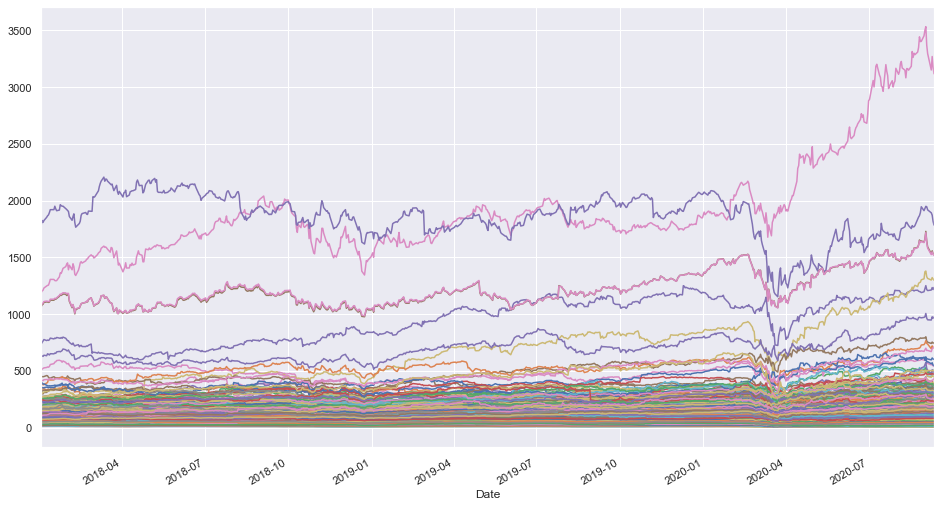

In [11]:
pivotted_df.plot(figsize=(16, 9), legend=False)

### Normalise Data

In [12]:
# Symbol, Date, normalized_price
df_normal = df_stock[['Symbol', 'Date']]

company_means = df_stock.groupby(df_stock.Symbol).Close.mean()
company_stds = df_stock.groupby(df_stock.Symbol).Close.std()

def normalise(row):
    #print(row)
    #print(type(row))
    symbol = row.Symbol
    return (row['Close'] - company_means[symbol]) / company_stds[symbol]

df_normal['NormalisedPrice'] = df_stock[['Symbol', 'Close']].apply(lambda x: normalise(x), axis='columns')
df_normal.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Symbol,Date,NormalisedPrice
0,MMM,2018-01-02,1.839867
1,MMM,2018-01-03,1.839502
2,MMM,2018-01-04,1.951754
3,MMM,2018-01-05,2.019543
4,MMM,2018-01-08,1.991115


### Display normalised data

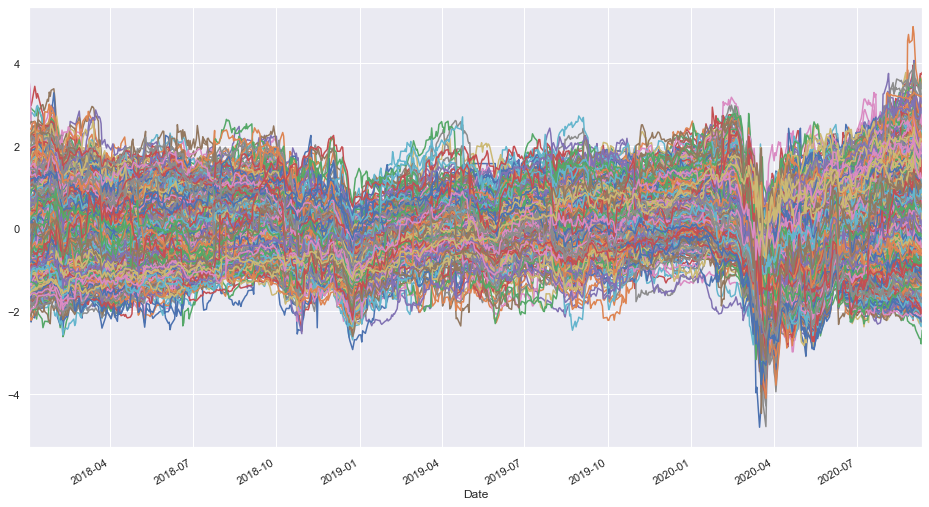

In [13]:
pivotted_normal_df = df_normal.pivot(index='Date', columns='Symbol', values='NormalisedPrice')
pivotted_normal_df.plot(figsize=(16, 9), legend=False)

In [14]:
# The stocks matrix in her R code corresponds to the pivotted-df
stocks_matrix = pivotted_normal_df
# Remove the date column and convert to a matrix because the package expects this format. 
stocks_matrix.reset_index(drop=True, inplace=True)
print(stocks_matrix.shape)

#Also need to transpose because it is expected data to be along rows.
stocks_matrix = stocks_matrix.transpose()
stocks_matrix.head()


(679, 489)


,0,1,2,3,4,5,6,7,8,9,...,669,670,671,672,673,674,675,676,677,678
Symbol,,,,,,,,,,,,,,,,,,,,,
A,-0.788574,-0.602567,-0.658801,-0.539843,-0.523622,-0.337615,-0.443596,-0.442514,-0.341940,-0.396012,...,2.704464,2.760699,2.836400,3.085129,2.676347,2.373544,2.189701,2.491421,2.560633,2.563877
AAL,1.793625,1.739556,1.767006,1.765343,1.722088,1.717929,1.859338,2.078940,2.249464,2.208704,...,-1.483760,-1.528678,-1.524519,-1.513705,-1.502892,-1.482096,-1.480432,-1.528678,-1.532006,-1.536996
AAP,-1.858414,-1.812819,-1.625217,-1.569173,-1.606694,-1.649439,-1.644689,-1.532603,-1.390594,-1.487483,...,0.453610,0.526751,0.530551,0.611766,0.473082,0.405166,0.309227,0.433663,0.396142,0.445061
AAPL,-0.827011,-0.827405,-0.816921,-0.791104,-0.799622,-0.799884,-0.800408,-0.787434,-0.763714,-0.775509,...,3.457937,3.679804,3.949244,3.803516,3.252057,3.256250,2.829551,3.065441,2.864672,2.786567
ABBV,0.877261,1.008160,0.959710,1.106760,0.969060,1.032810,0.986061,0.950360,1.041310,1.224059,...,0.516862,0.652862,0.352813,0.498162,0.321364,0.321364,0.181114,0.300963,0.132665,0.136914


# Cluster the data

## Euclidean Distance Matrix

In [15]:
from sklearn.metrics.pairwise import euclidean_distances


### Visualize distance matrix

In [16]:
dist_matrix = euclidean_distances(stocks_matrix, stocks_matrix)
dist_matrix.shape

(489, 489)

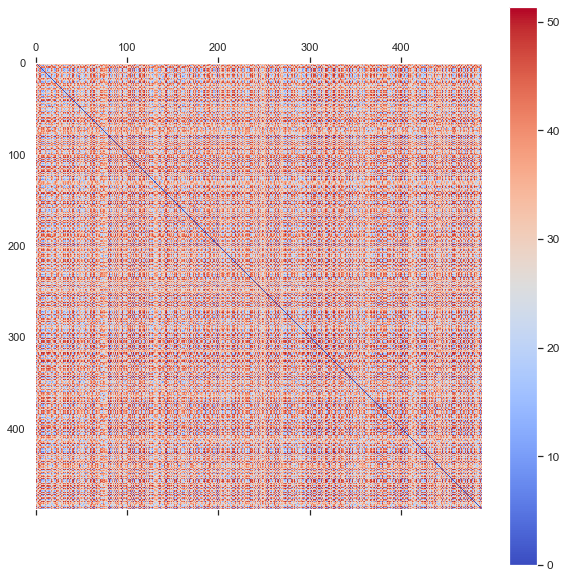

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.matshow(dist_matrix, fignum=fig.number, cmap='coolwarm')
ax = plt.gca()
ax.grid(False)

color_bar = plt.colorbar()
color_bar.ax.tick_params(labelsize=12)

### Cluster using HAC and linked average

We will use the scipy.cluster.hierarchy.linkage pakage for the HAC clustering. However this won't take the $n x n$ distance matrix but an 1D array.

The 1D array is a 1-D condensed distance matrix with of length ${n \choose 2}$

In our example we have $n = 679$ time series which results in a condensed distance matrix of the length ${489 \choose 2} = 119316$

We can compute the condensed matrix with the scipy.spatial.distance.pdist package


In [18]:
from scipy.spatial.distance import pdist, squareform
# pdist:        Pairwise distances between observations in n-dimensional space.
# squareform:   Convert a vector-form distance vector to a square-form distance matrix, and vice-versa. 
from scipy.cluster.hierarchy import dendrogram, linkage


In [19]:
distances = pdist(stocks_matrix.values, metric='euclidean')
distances.shape
#stats.describe(distances)
#dist_matrix = squareform(distances)

(119316,)

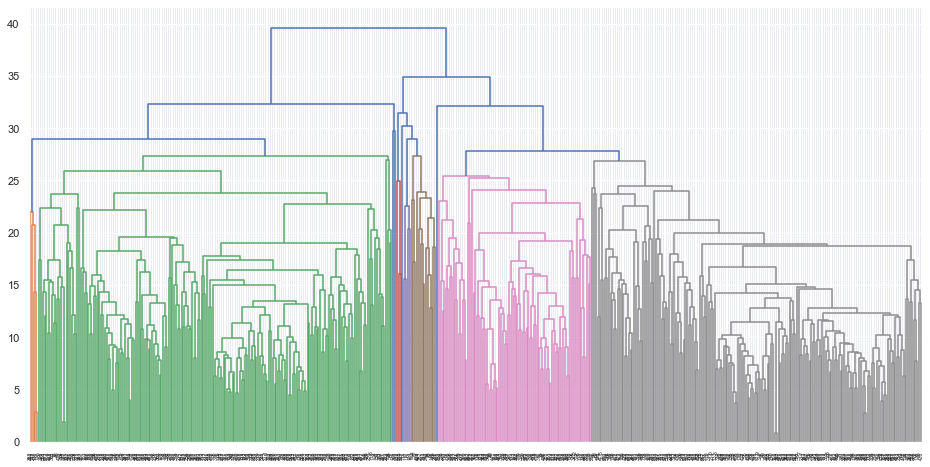

In [20]:
hca_eucl_cluster = linkage(distances, 'average')
fig = plt.figure(figsize=(16, 8))
dn = dendrogram(hca_eucl_cluster)


Let’s choose the number of clusters to be 10 and plot the data for each cluster.

In [21]:
from scipy.cluster.hierarchy import cut_tree
# Given a linkage matrix Z, return the cut tree.

In [22]:
cut_clus = cut_tree(hca_eucl_cluster, 10).flatten()

In [23]:
cut_clus.shape

(489,)

In [24]:
# make a data frame out of this information
symbols = stocks_matrix.index.to_numpy()
symbols.shape
cluster_data10 = pd.DataFrame({'Symbol': symbols, 'Cluster': cut_clus})
    
cluster_data10.head()

,Symbol,Cluster
0,A,0
1,AAL,1
2,AAP,0
3,AAPL,0
4,ABBV,2


### Join normalised stocks-close data with clusters

Her 'stocks_close' is mine 'df_normal'


In [25]:
stocks_clust = pd.merge(cluster_data10, df_normal, on='Symbol')
stocks_clust.head()

,Symbol,Cluster,Date,NormalisedPrice
0,A,0,2018-01-02,-0.788574
1,A,0,2018-01-03,-0.602567
2,A,0,2018-01-04,-0.658801
3,A,0,2018-01-05,-0.539843
4,A,0,2018-01-08,-0.523622


In [26]:
grouped_stocks = stocks_clust.groupby(['Cluster'])
grouped_stocks.head()

,Symbol,Cluster,Date,NormalisedPrice
0,A,0,2018-01-02,-0.788574
1,A,0,2018-01-03,-0.602567
2,A,0,2018-01-04,-0.658801
3,A,0,2018-01-05,-0.539843
4,A,0,2018-01-08,-0.523622
679,AAL,1,2018-01-02,1.793625
680,AAL,1,2018-01-03,1.739556
681,AAL,1,2018-01-04,1.767006
682,AAL,1,2018-01-05,1.765343
683,AAL,1,2018-01-08,1.722088


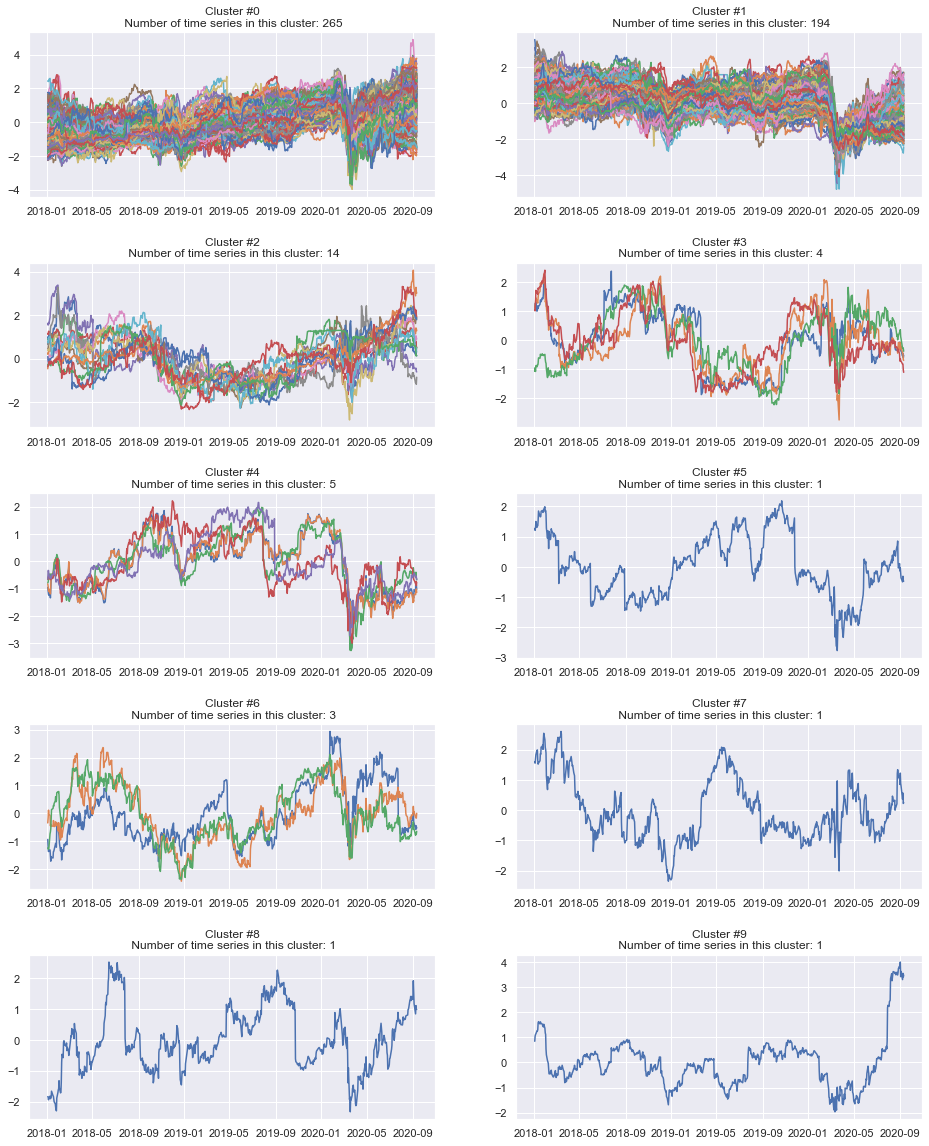

In [27]:
nbr_rows = 5
rowlength = int(grouped_stocks.ngroups/nbr_rows)

# fix up if odd number of groups
fig, axs = plt.subplots(figsize=(16,20), 
                        nrows=nbr_rows, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped_stocks.groups.keys(), axs.flatten())
for (key, ax) in targets:
    foo = grouped_stocks.get_group(key).pivot(index='Date', columns='Symbol', values='NormalisedPrice')
    ax.plot(foo)
    ax.set_title(f'Cluster #{key}\n Number of time series in this cluster: {len(foo.columns)}')



# Dynamic Time Warping (DTW)

## Calculate DTW Distance matrix

In [28]:
#from dtw import dtw, rabinerJuangStepPattern
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [29]:
stocks_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,669,670,671,672,673,674,675,676,677,678
Symbol,,,,,,,,,,,,,,,,,,,,,
A,-0.788574,-0.602567,-0.658801,-0.539843,-0.523622,-0.337615,-0.443596,-0.442514,-0.341940,-0.396012,...,2.704464,2.760699,2.836400,3.085129,2.676347,2.373544,2.189701,2.491421,2.560633,2.563877
AAL,1.793625,1.739556,1.767006,1.765343,1.722088,1.717929,1.859338,2.078940,2.249464,2.208704,...,-1.483760,-1.528678,-1.524519,-1.513705,-1.502892,-1.482096,-1.480432,-1.528678,-1.532006,-1.536996
AAP,-1.858414,-1.812819,-1.625217,-1.569173,-1.606694,-1.649439,-1.644689,-1.532603,-1.390594,-1.487483,...,0.453610,0.526751,0.530551,0.611766,0.473082,0.405166,0.309227,0.433663,0.396142,0.445061
AAPL,-0.827011,-0.827405,-0.816921,-0.791104,-0.799622,-0.799884,-0.800408,-0.787434,-0.763714,-0.775509,...,3.457937,3.679804,3.949244,3.803516,3.252057,3.256250,2.829551,3.065441,2.864672,2.786567
ABBV,0.877261,1.008160,0.959710,1.106760,0.969060,1.032810,0.986061,0.950360,1.041310,1.224059,...,0.516862,0.652862,0.352813,0.498162,0.321364,0.321364,0.181114,0.300963,0.132665,0.136914


In [30]:
stocks_np_matrix = stocks_matrix.to_numpy()
stocks_np_matrix

array([[-0.78857407, -0.60256688, -0.65880122, ...,  2.49142138,
         2.56063328,  2.56387737],
       [ 1.79362458,  1.73955589,  1.7670059 , ..., -1.52867825,
        -1.53200555, -1.53699649],
       [-1.85841381, -1.81281893, -1.6252165 , ...,  0.43366261,
         0.39614172,  0.44506078],
       ...,
       [-2.05893449, -2.01256279, -1.96551564, ...,  1.34916374,
         1.22152891,  1.23323451],
       [ 0.6186818 ,  0.61132925,  0.63706219, ..., -1.65808156,
        -1.78061969, -1.73528062],
       [-1.56195979, -1.54777924, -1.52930157, ...,  2.1825529 ,
         2.14774629,  2.16880176]])

## Perform k-means clustering using DTW

In [31]:
from tslearn.clustering import TimeSeriesKMeans

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/site-packages/tslearn/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [32]:
stocks_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,669,670,671,672,673,674,675,676,677,678
Symbol,,,,,,,,,,,,,,,,,,,,,
A,-0.788574,-0.602567,-0.658801,-0.539843,-0.523622,-0.337615,-0.443596,-0.442514,-0.341940,-0.396012,...,2.704464,2.760699,2.836400,3.085129,2.676347,2.373544,2.189701,2.491421,2.560633,2.563877
AAL,1.793625,1.739556,1.767006,1.765343,1.722088,1.717929,1.859338,2.078940,2.249464,2.208704,...,-1.483760,-1.528678,-1.524519,-1.513705,-1.502892,-1.482096,-1.480432,-1.528678,-1.532006,-1.536996
AAP,-1.858414,-1.812819,-1.625217,-1.569173,-1.606694,-1.649439,-1.644689,-1.532603,-1.390594,-1.487483,...,0.453610,0.526751,0.530551,0.611766,0.473082,0.405166,0.309227,0.433663,0.396142,0.445061
AAPL,-0.827011,-0.827405,-0.816921,-0.791104,-0.799622,-0.799884,-0.800408,-0.787434,-0.763714,-0.775509,...,3.457937,3.679804,3.949244,3.803516,3.252057,3.256250,2.829551,3.065441,2.864672,2.786567
ABBV,0.877261,1.008160,0.959710,1.106760,0.969060,1.032810,0.986061,0.950360,1.041310,1.224059,...,0.516862,0.652862,0.352813,0.498162,0.321364,0.321364,0.181114,0.300963,0.132665,0.136914


In [33]:
#stocks_to_use = stocks_matrix.iloc[0:5]
stocks_to_use = stocks_matrix.iloc[0:100]

data = stocks_to_use.to_numpy()

In [34]:
nbr_clusters = 5
model = TimeSeriesKMeans(n_clusters=nbr_clusters, 
                         metric="dtw", 
                         max_iter=50,
                         verbose=True,
                         random_state=42,
                        )

In [35]:
clusters = model.fit_predict(data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.0s finished


85.296 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.2s finished


30.399 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.2s finished


28.751 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.1s finished


28.103 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.0s finished


27.975 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.1s finished


27.975 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.0s finished


In [36]:
clusters

array([3, 1, 2, 4, 0, 0, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 1, 1, 1, 2, 4,
       4, 0, 2, 1, 0, 2, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 4, 2, 4, 0, 1, 4,
       3, 0, 4, 2, 2, 1, 3, 0, 4, 2, 4, 1, 1, 4, 3, 0, 1, 0, 4, 1, 2, 1,
       0, 4, 0, 2, 4, 0, 1, 1, 0, 0, 0, 1, 1, 0, 4, 1, 4, 2, 0, 0, 1, 1,
       4, 2, 4, 0, 2, 0, 4, 1, 0, 2, 4, 3])

In [37]:
symbols = stocks_to_use.index.to_numpy()
symbols
cluster_symbol_df = pd.DataFrame({'Symbol': symbols, 'Cluster': clusters})


In [38]:
cluster_symbol_df

,Symbol,Cluster
0,A,3
1,AAL,1
2,AAP,2
3,AAPL,4
4,ABBV,0
...,...,...
95,CMA,1
96,CMCSA,0
97,CME,2
98,CMG,4


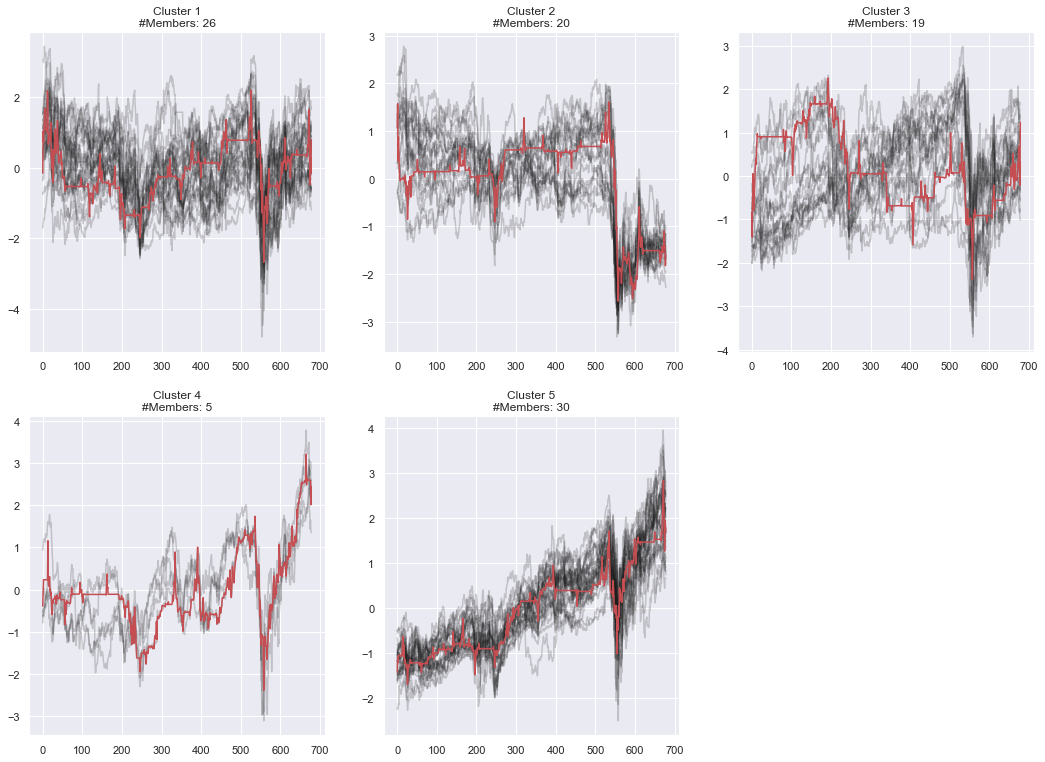

In [39]:
fig = plt.figure(figsize=(18,20))

for i in range(nbr_clusters):
    cluster_nbr = i + 1
    cluster_members = data[clusters == i]
    n_rows__columns = nbr_clusters//2 +1
    plt.subplot(n_rows__columns, n_rows__columns, cluster_nbr)
    
    for ts_data in cluster_members:
        plt.plot(ts_data.ravel(), "k-", alpha=.2)
        
    
    plt.plot(model.cluster_centers_[i].ravel(), "r-")
    
    
    #plt.text(0.55, 0.85,f'Cluster {cluster_nbr}\n#Members: {len(cluster_members)}',
    #         transform=plt.gca().transAxes)
    plt.title(f'Cluster {cluster_nbr}\n#Members: {len(cluster_members)}')



## CVI

### Silhouette Coefficient

In [40]:
from tslearn.clustering import silhouette_score

In [41]:
silhouette_score(data, clusters)

0.267762757171129